In [2]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

PYPLOT_STYLE = os.environ.get("PYPLOT_STYLE", "tableau-colorblind10")
plt.style.use(PYPLOT_STYLE)
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
filename = "../experiments/loading_pool.csv"
file_title = os.path.splitext(os.path.basename(filename))[0]
df = pd.read_csv(filename)
df.insert(len(df.columns) - 1, 'pt', df.policy + '-' + df.temp)
df = df.drop(['policy', 'temp'], axis=1)
df

,url,metric,pt,seconds
0,http://81.cn/fb/index.htm,firstPaint,block3p-cold,4.428445
1,http://81.cn/fb/index.htm,firstPaint,block3p-hot,0.895944
2,http://81.cn/fb/index.htm,firstContentfulPaint,block3p-cold,4.428445
3,http://81.cn/fb/index.htm,firstContentfulPaint,block3p-hot,0.895944
4,http://81.cn/fb/index.htm,largestContentfulPaint,block3p-cold,4.428445
...,...,...,...,...
386527,http://zhanzhang.so.com/sitetool/sitemap,firstContentfulPaint,vanilla-hot,2.150514
386528,http://zhanzhang.so.com/sitetool/sitemap,largestContentfulPaint,vanilla-cold,3.698216
386529,http://zhanzhang.so.com/sitetool/sitemap,largestContentfulPaint,vanilla-hot,2.780491
386530,http://zhanzhang.so.com/sitetool/sitemap,loadEventStart,vanilla-cold,4.717539


In [4]:
df.sort_values('seconds')

,url,metric,pt,seconds
385944,http://www.tianya.cn/,domInteractive,vanilla-cold,0.019771
192647,http://www.tianya.cn/,domInteractive,page-length-hot,0.019789
385946,http://www.tianya.cn/,domContentLoadedEventStart,vanilla-cold,0.019823
192649,http://www.tianya.cn/,domContentLoadedEventStart,page-length-hot,0.019840
385969,http://www.tianya.cn/,domInteractive,vanilla-hot,0.019867
...,...,...,...,...
380520,https://www.wunderground.com/wundermap,loadEventStart,vanilla-cold,29.014701
168362,https://www.oppomobile.com/,loadEventStart,page-length-cold,29.287192
313839,https://realty.ria.ru/,loadEventStart,vanilla-hot,29.362130
321737,https://video.foxnews.com/#sp=show-clips,loadEventStart,vanilla-hot,29.386714


In [5]:
# organize data by median-metric-per-url for each policy/temp pair
metric_map = {metric: data.drop('metric', axis=1) for metric, data in df.groupby('metric')}


In [6]:
tdf = metric_map['loadEventStart']
mtdf = tdf.groupby(['url', 'pt']).seconds.median().unstack()
refcol = 'vanilla-cold'
new_data = {url: { col: mtdf.loc[url][col] / mtdf.loc[url][refcol] for col in mtdf.columns} for url in mtdf.index }
nddf = pd.DataFrame(new_data).transpose()
nddf

,block3p-cold,block3p-hot,page-length-cold,page-length-hot,split-key-cold,split-key-hot,vanilla-cold,vanilla-hot
http://360game.360.cn/,0.588303,0.684642,0.583570,0.713267,0.617616,0.683392,1.0,0.691466
http://81.cn/,1.079100,1.008857,1.055630,1.003782,1.027951,0.964281,1.0,1.028763
http://81.cn/fb/2020-09/03/content_9896249.htm,0.998937,0.943213,1.072206,1.009668,1.078387,0.990570,1.0,1.047773
http://81.cn/fb/index.htm,0.905138,0.986020,1.052267,0.872540,0.912723,1.015690,1.0,1.063583
http://81.cn/yd/2020-09/03/content_9896214.htm,0.893410,0.802830,1.031618,0.898018,0.957157,0.852671,1.0,0.762225
...,...,...,...,...,...,...,...,...
https://zippyshare.com/sites/registration.jsp,1.039829,0.896524,1.087202,0.938086,1.023770,0.886860,1.0,0.828127
https://zoom.us/,1.027597,0.980541,1.024161,0.988791,0.991366,0.944871,1.0,0.969183
https://zoom.us/education,0.980912,0.917522,1.006696,0.891938,1.015662,0.933761,1.0,0.926976
https://zoom.us/join,1.029873,0.821463,1.073964,0.840480,0.965371,0.799026,1.0,0.840892


In [14]:
nddf.quantile(0.99)

block3p-cold        1.532926
block3p-hot         1.897154
page-length-cold    1.536616
page-length-hot     2.126797
split-key-cold      1.463037
split-key-hot       2.216666
vanilla-cold        1.000000
vanilla-hot         1.877666
Name: 0.99, dtype: float64

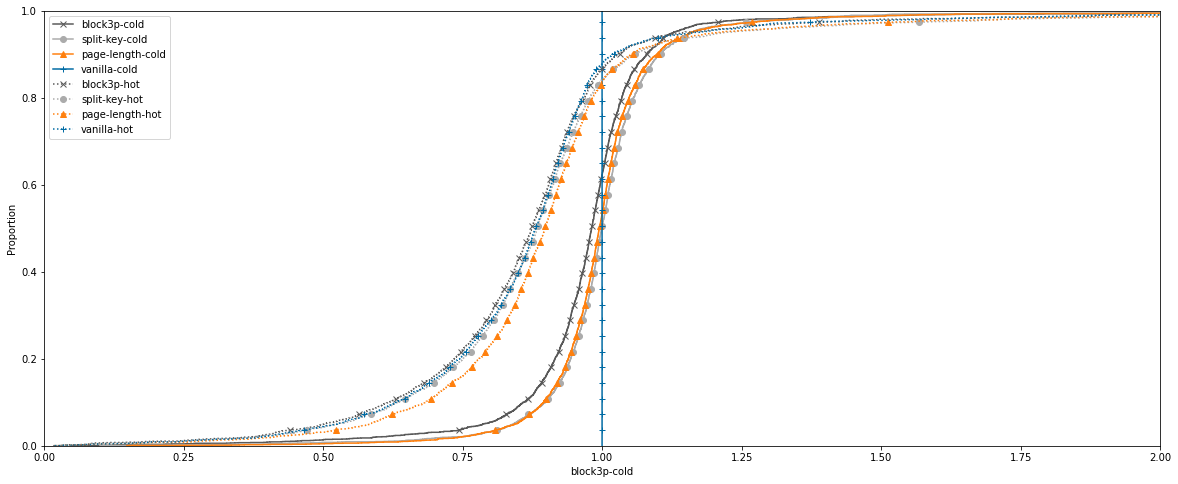

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
line_spec = [
    ('block3p-cold', COLORS[3], 'x', '-'),
    ('split-key-cold', COLORS[2], 'o', '-'),
    ('page-length-cold', COLORS[1], '^', '-'),
    ('vanilla-cold', COLORS[0], '+', '-'),
    ('block3p-hot', COLORS[3], 'x', ':'),
    ('split-key-hot', COLORS[2], 'o', ':'),
    ('page-length-hot', COLORS[1], '^', ':'),
    ('vanilla-hot', COLORS[0], '+', ':'),
]
for s, c, m, ls in line_spec:
    #nddf[s].plot.density(ax=ax, color=c, marker=m, ls=ls, legend=True, markevery=100)
    sns.ecdfplot(nddf[s], label=s, color=c, marker=m, ls=ls, markevery=100, ax=ax)

ax.set_xlim((0, 2))
ax.legend()

In [20]:
tdf = metric_map['loadEventStart']
mtdf = tdf.groupby(['url', 'pt']).seconds.median().unstack()
print(mtdf.quantile(0.99))
smtdf = mtdf.sort_values('vanilla-cold')


pt
block3p-cold        20.021569
block3p-hot         19.349092
page-length-cold    22.228843
page-length-hot     20.909987
split-key-cold      22.585108
split-key-hot       21.343718
vanilla-cold        21.797336
vanilla-hot         20.241624
Name: 0.99, dtype: float64


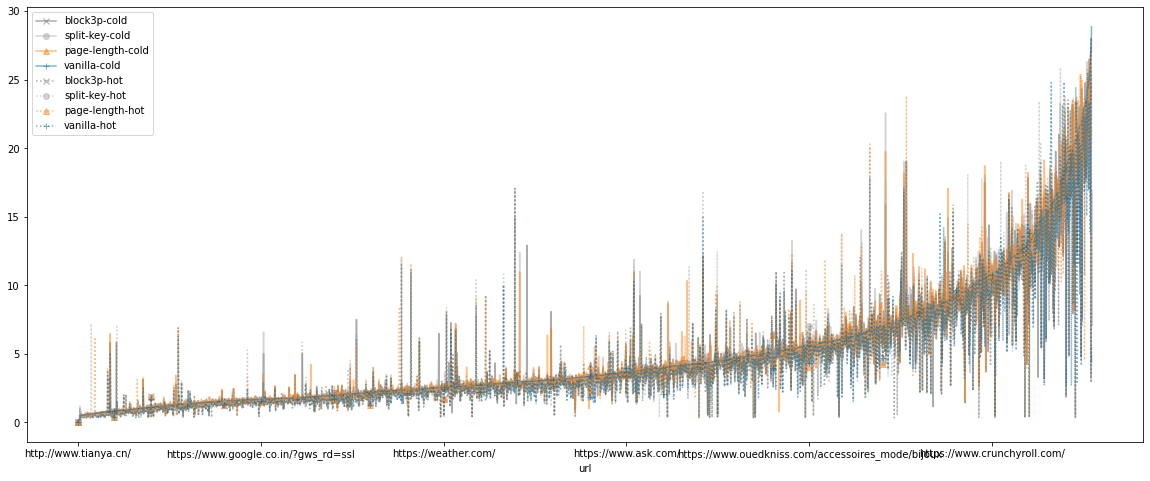

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
line_spec = [
    ('block3p-cold', COLORS[3], 'x', '-'),
    ('split-key-cold', COLORS[2], 'o', '-'),
    ('page-length-cold', COLORS[1], '^', '-'),
    ('vanilla-cold', COLORS[0], '+', '-'),
    ('block3p-hot', COLORS[3], 'x', ':'),
    ('split-key-hot', COLORS[2], 'o', ':'),
    ('page-length-hot', COLORS[1], '^', ':'),
    ('vanilla-hot', COLORS[0], '+', ':'),
]
for s, c, m, ls in line_spec:
    #smtdf[s].ewm(alpha=0.1).mean().plot(ax=ax, alpha=0.5, color=c, marker=m, ls=ls, legend=True, markevery=100)
    smtdf[s].plot(ax=ax, alpha=0.5, color=c, marker=m, ls=ls, legend=True, markevery=100)

In [11]:
t2df = metric_map['loadEventStart']
mt2df = tdf.groupby(['url', 'pt']).seconds.median().unstack()
mt2df.insert(0, 'medsort', mt2df.transpose().median())
smt2df = mt2df.sort_values('medsort')


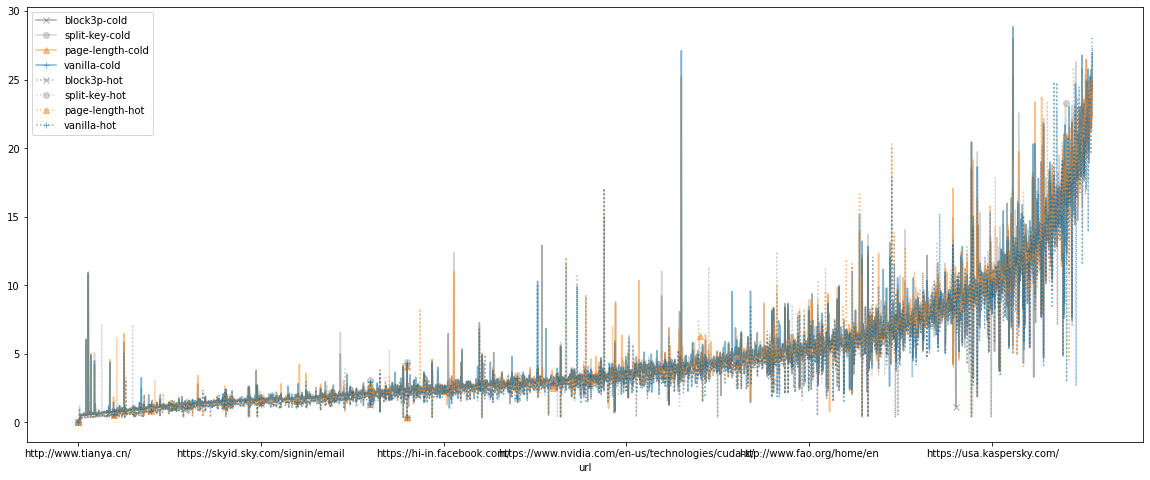

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
line_spec = [
    ('block3p-cold', COLORS[3], 'x', '-'),
    ('split-key-cold', COLORS[2], 'o', '-'),
    ('page-length-cold', COLORS[1], '^', '-'),
    ('vanilla-cold', COLORS[0], '+', '-'),
    ('block3p-hot', COLORS[3], 'x', ':'),
    ('split-key-hot', COLORS[2], 'o', ':'),
    ('page-length-hot', COLORS[1], '^', ':'),
    ('vanilla-hot', COLORS[0], '+', ':'),
]
for s, c, m, ls in line_spec:
    #smt2df[s].ewm(alpha=0.1).mean().plot(ax=ax, alpha=0.5, color=c, marker=m, ls=ls, legend=True, markevery=100)
    smt2df[s].plot(ax=ax, alpha=0.5, color=c, marker=m, ls=ls, legend=True, markevery=100)
